## problem defination:
Main goal of this project: Predict the compressive strength (in MPa) based on the input ingredients and age of the concrete.

## Import the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,Normalizer,MinMaxScaler  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

!pip install xgboost
from sklearn.model_selection import GridSearchCV


from xgboost import XGBRFRegressor #(pip → Python's package installer, install → Command to install a package, xgboost → The name of the machine learning library you're installing)

import os
import warnings
warnings.filterwarnings("ignore")

## Load the Datasets

In [11]:
df=pd.read_csv("Concrete_compressive_strength.csv")
print(df)
df.head()

      Cement   Blast Furnace Slag  Fly Ash   Water    Superplasticizer  \
0         540                   0         0      162                 3   
1         540                   0         0      162                 3   
2         333                 143         0      228                 0   
3         333                 143         0      228                 0   
4         199                 132         0      192                 0   
...       ...                 ...       ...      ...               ...   
1025      276                 116        90      180                 9   
1026      322                   0       116      196                10   
1027      149                 139       109      193                 6   
1028      159                 187         0      176                11   
1029      261                 101        78      201                 9   

      Coarse Aggregate   Fine Aggregate  Age (day)  \
0                  1040             676         28   
1  

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540,0,0,162,3,1040,676,28,80
1,540,0,0,162,3,1055,676,28,62
2,333,143,0,228,0,932,594,270,40
3,333,143,0,228,0,932,594,365,41
4,199,132,0,192,0,978,826,360,44


## Data Preprocessing

In [13]:
# Understand the Data Structure

print(df.shape) # rows & columns
print(df.columns) # columns
# statistical Describe
print(df.info()) # data types & nulls
#Descriptive Statistics
print("\n summary statistics:")
print(df.describe().T) # summary stats

(1030, 9)
Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash ', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate ', 'Fine Aggregate', 'Age (day)',
       'Concrete compressive strength'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Cement                         1030 non-null   int64
 1   Blast Furnace Slag             1030 non-null   int64
 2   Fly Ash                        1030 non-null   int64
 3   Water                          1030 non-null   int64
 4   Superplasticizer               1030 non-null   int64
 5   Coarse Aggregate               1030 non-null   int64
 6   Fine Aggregate                 1030 non-null   int64
 7   Age (day)                      1030 non-null   int64
 8   Concrete compressive strength  1030 non-null   int64
dtypes: int64(9)
memory usage: 72.6 KB
No

In [15]:
# Rename columns by removing units (manually or with regex)
df.columns = [
    'Cement',
    'Blast Furnace Slag',
    'Fly Ash',
    'Water',
    'Superplasticizer',
    'Coarse Aggregate',
    'Fine Aggregate',
    'Age',
    'Concrete compressive strength'
]

# Show the cleaned column names
print(df.columns)

## Alternative way
# To remove units from the column names in the dataset (Using Regex to Remove Units Automatically)
import re
df.columns=[re.sub(r"\s*\([^)]*\)","",col).strip() for col in df.columns]
print(df.columns)


Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')
Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')


In [17]:
# check for missing values
print(df.isnull().sum()) # total missing of each column
# Handle the missing data
df.dropna(inplace=True) 


Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64


In [19]:
# Data Normalization & scaling
# Assuming your dataframe is already loaded as df
scaler = StandardScaler()
# Initialize scaler
scaler = StandardScaler()

# Apply scaling (excluding target column)
scaled_features = scaler.fit_transform(df.drop('Concrete compressive strength', axis=1))
# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age(day)'])

print("\nScaled Data:")
print(df_scaled)


# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Feature & Target Split
# Separate features and target
X = df.drop('Concrete compressive strength', axis=1)
y = df['Concrete compressive strength']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame if needed
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)                       


Scaled Data:
        Cement  Blast Furnace Slag   Fly Ash     Water  Superplasticizer  \
0     2.477725           -0.856958 -0.847256 -0.918959         -0.539884   
1     2.477725           -0.856958 -0.847256 -0.918959         -0.539884   
2     0.495854            0.801122 -0.847256  2.172738         -1.040857   
3     0.495854            0.801122 -0.847256  2.172738         -1.040857   
4    -0.787097            0.673577 -0.847256  0.486358         -1.040857   
...        ...                 ...       ...       ...               ...   
1025 -0.049879            0.488058  0.559526 -0.075769          0.462063   
1026  0.390537           -0.856958  0.965929  0.673733          0.629054   
1027 -1.265810            0.754742  0.856513  0.533202         -0.038911   
1028 -1.170067            1.311300 -0.847256 -0.263144          0.796045   
1029 -0.193493            0.314133  0.371955  0.907953          0.462063   

      Coarse Aggregate  Fine Aggregate  Age(day)  
0             0.862872

## Exploratory Data Analysis (EDA)


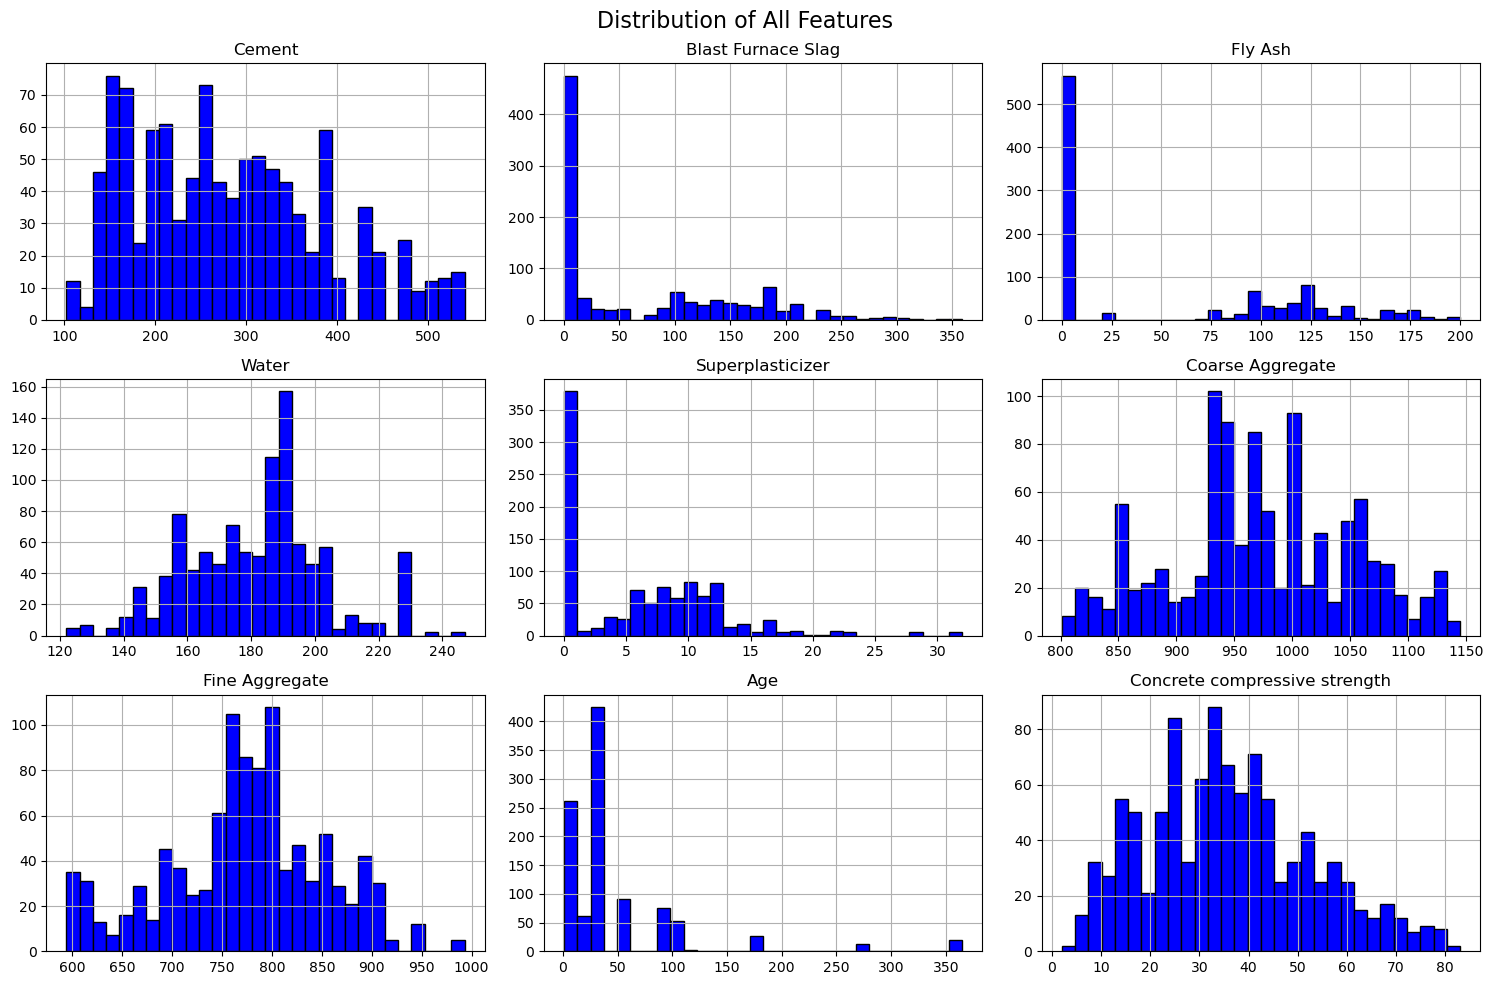

In [21]:
#visuallisation

#Histogram for Distribution of Each Feature
df.hist(figsize=(15, 10), bins=30, color='blue',edgecolor='black')
plt.suptitle("Distribution of All Features", fontsize=16)
plt.tight_layout()
plt.show()


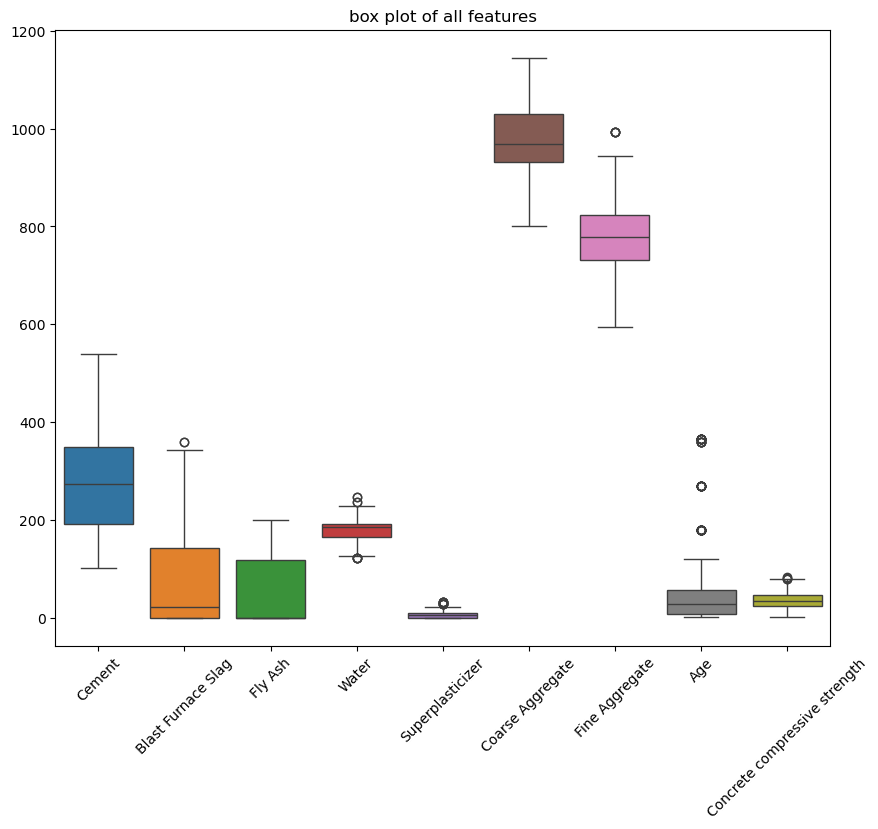

In [26]:
# Boxplot for outliers Each boxplot gives 5 key statistics:

#(Bottom line = minimum (excluding outliers),Bottom of box = 25th percentile (Q1),Line in box = median (50th percentile),Top of box = 75th percentile (Q3),Top line = maximum (excluding outliers),Dots outside the lines = outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title("box plot of all features")
plt.xticks(rotation=45)
plt.show()

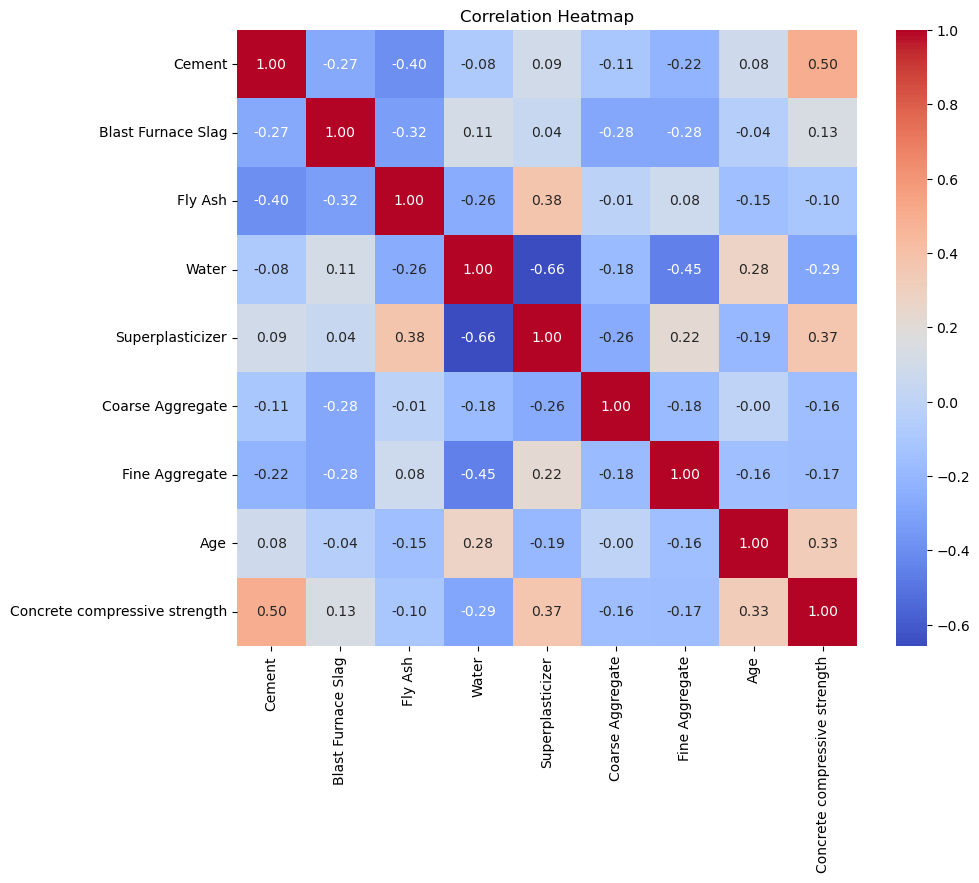

In [23]:
#correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
         

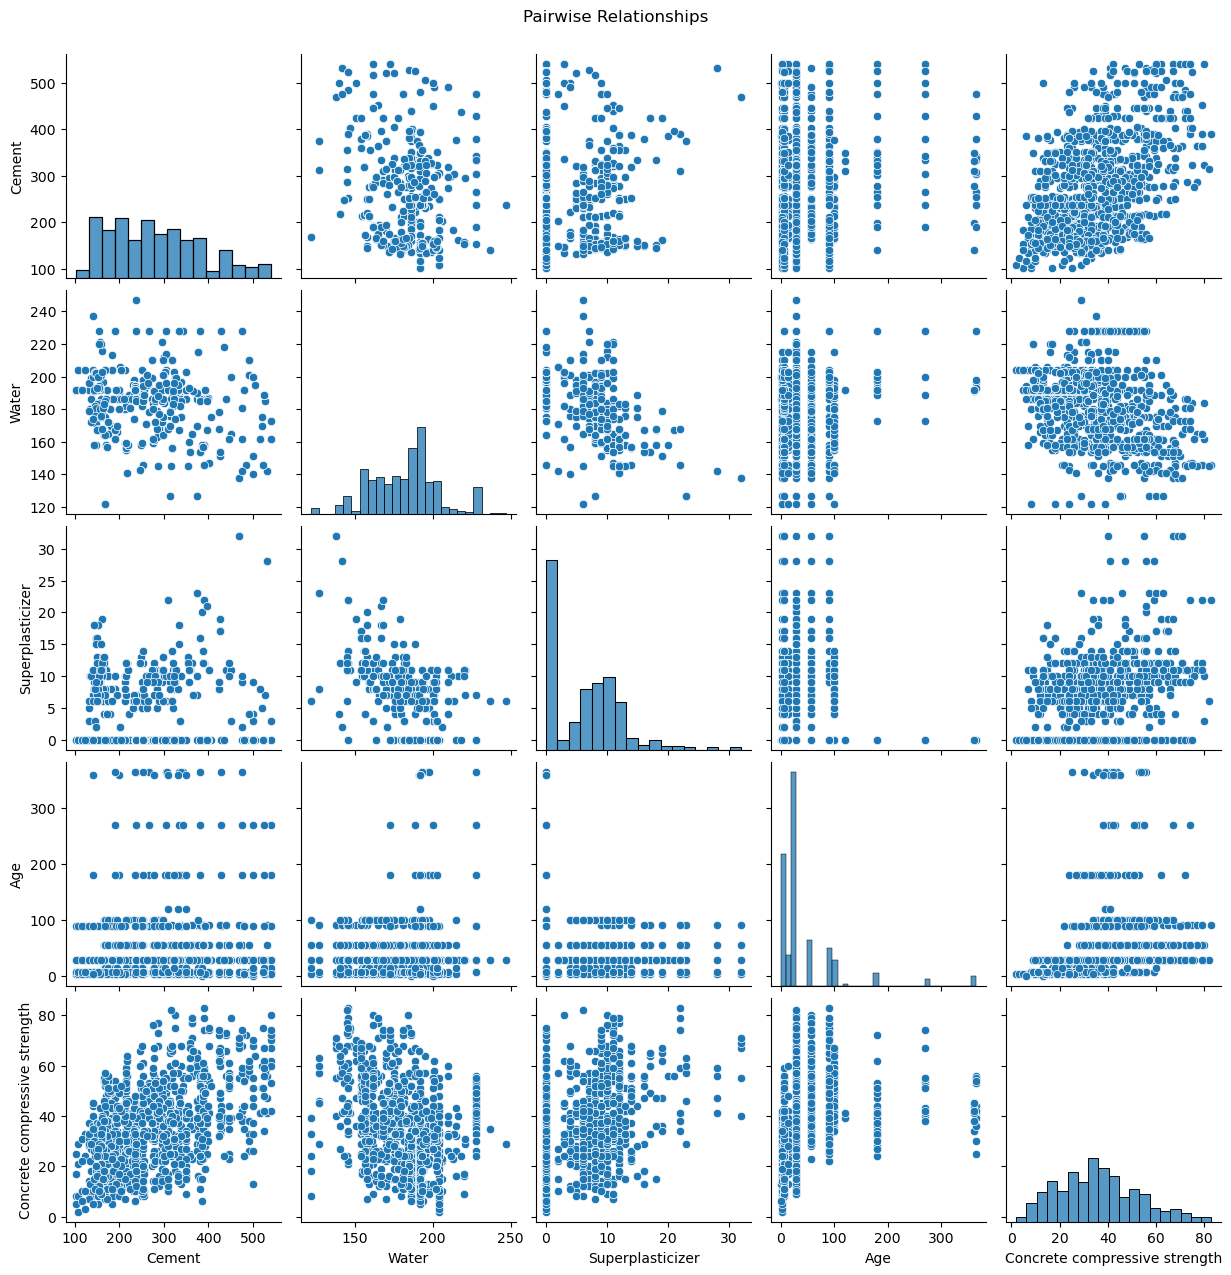

In [44]:
# pairplot for relationship patterns
sns.pairplot(df[['Cement', 'Water', 'Superplasticizer', 'Age', 'Concrete compressive strength']])
plt.suptitle("Pairwise Relationships",y=1.02)
plt.show()

In [ ]:
# Concrete Strength vs Each Feature (Line/Scatter Plots)

In [ ]:
# Concrete Strength by Age Group

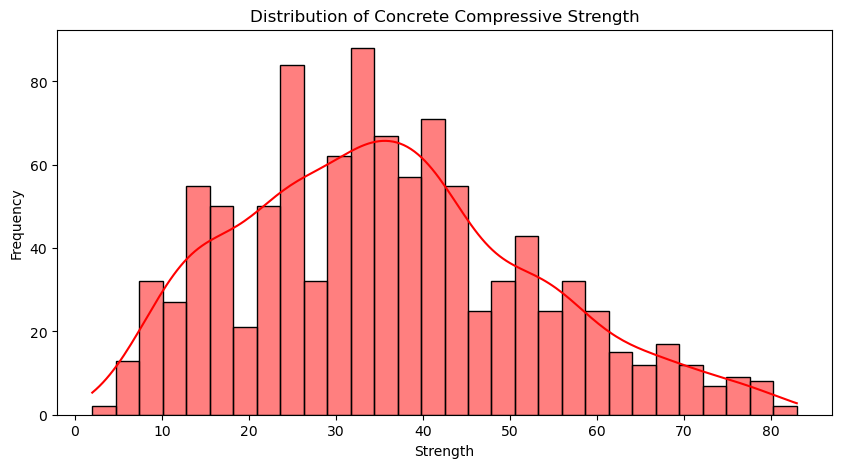

In [30]:
# Distribution of Target (Concrete Strength)
plt.figure(figsize=(10,5))
sns.histplot(df['Concrete compressive strength'], bins=30, kde=True, color='red')
plt.title("Distribution of Concrete Compressive Strength")
plt.xlabel("Strength")
plt.ylabel("Frequency")
plt.show()

## Train_Test_Split

In [25]:
# Assuming you already have features in X and target in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Building (Try various Algorithm)(Training)

In [27]:
# Linear Regression

lr=LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr=lr.predict(X_test_scaled)

In [29]:
# Decission Tree Regeressor

dt=DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred_dt=dt.predict(X_test_scaled)


In [31]:
#  Random Forest Regressor

rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf=rf.predict(X_test_scaled)


In [35]:
# Support Vector Regressor (SVR)

svr=SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr=svr.predict(X_test_scaled)

In [37]:
# XGBRFRegressor

xgb=XGBRFRegressor()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb=xgb.predict(X_test_scaled)

## Model Evaluation (Use RMSE, R², Cross-Validation)

In [39]:
def evaluate(y_true,y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred)) #Measures average prediction error. Lower is better.
    r2 = r2_score(y_true, y_pred) #Proportion of variance in the target explained by the model. Ranges from -∞ to 1, where 1 is perfect.
    print(f"{name} = rmse:{rmse: .2f}, r2:{r2: .2f}") 
    
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_svr, "SVR")
evaluate(y_test, y_pred_xgb, "XGBRFRegressor")


Linear Regression = rmse: 9.80, r2: 0.63
Decision Tree = rmse: 6.44, r2: 0.84
Random Forest = rmse: 5.52, r2: 0.88
SVR = rmse: 9.46, r2: 0.65
XGBRFRegressor = rmse: 6.85, r2: 0.82


In [41]:
# Initialize a list to hold model evaluation results
results = []

# Define a function to evaluate and store metrics
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    results.append({
        'Model': model_name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 2)
    })

# Call evaluate for each model
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_svr, "SVR")
evaluate(y_test, y_pred_xgb, "XGBRFRegressor")

# Create DataFrame
df_results = pd.DataFrame(results)

# Display the results as a table
print(df_results)


               Model   MAE    MSE  RMSE  R2 Score
0  Linear Regression  7.74  96.01  9.80      0.63
1      Decision Tree  4.33  41.42  6.44      0.84
2      Random Forest  3.80  30.43  5.52      0.88
3                SVR  7.52  89.57  9.46      0.65
4     XGBRFRegressor  5.39  46.86  6.85      0.82


In [88]:
# Model Results Overview

#Linear Regression	9.80	0.63	Decent performance. Explains 63% of the variance.
#Decision Tree	28.48	-2.15	Poor. Overfitting or bad split. Negative R² means worse than predicting mean.
#Random Forest	26.33	-1.69	Also poor. Likely overfitting or insufficient tuning.
#SVR (SVM Regressor)	9.46	0.65	Slightly better than Linear Regression. Good fit.
#XGBRFRegressor	6.85	0.82	Best model so far. Low error and explains 82% of variance. Very good generalization.

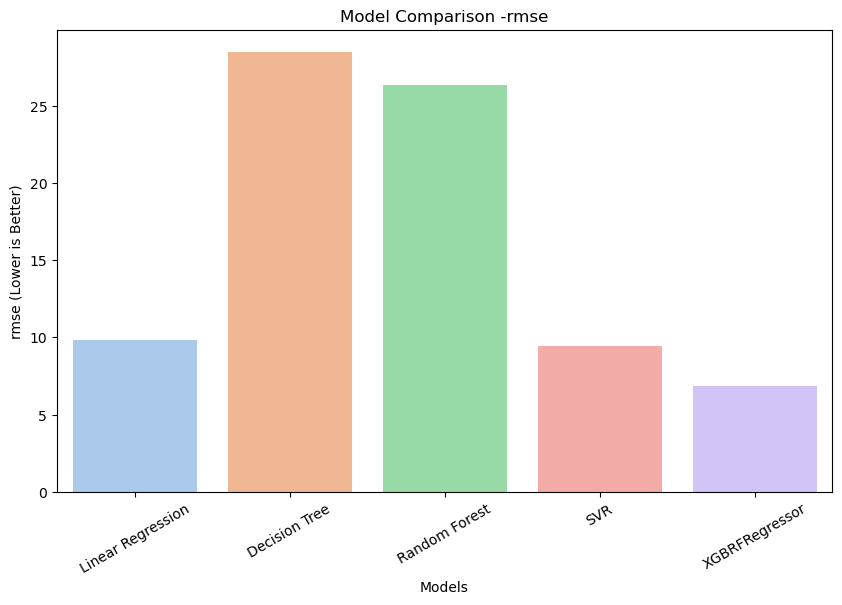

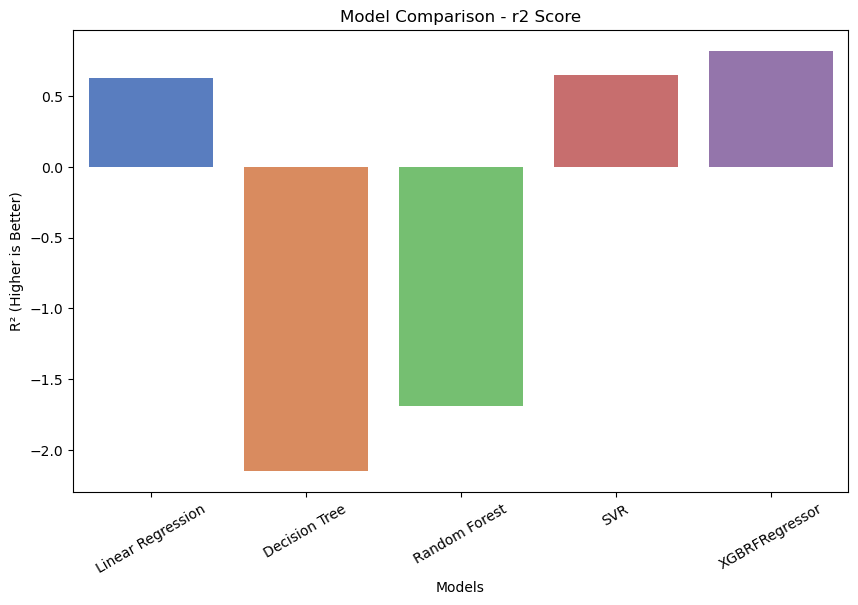

In [43]:
#Visualize RMSE and R² for All Models

# Data
Results={
    'Models':['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBRFRegressor'],
    'rmse':[9.80, 28.48, 26.33, 9.46, 6.85],
    'r2':[0.63, -2.15, -1.69, 0.65, 0.82] 
}

# create a dataframe
df_results=pd.DataFrame(Results)

# plot rmse # Lower is better
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='rmse', data=df_results, palette='pastel')
plt.title('Model Comparison -rmse')
plt.xticks(rotation=30)
plt.ylabel("rmse (Lower is Better)")
plt.show()

# R² Plot # Higher is better.
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='r2', data=df_results, palette='muted')
plt.title('Model Comparison - r2 Score')
plt.ylabel("R² (Higher is Better)")
plt.xlabel("Models")
plt.xticks(rotation=30)
plt.show()

## Improve the Model

In [45]:
# Hyperparameter Tuning with GridSearchCV

# 1. Define the model
model = XGBRFRegressor(random_state=42)

# 2. Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# 3. Set up GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=3,                 # 3-fold cross-validation
                           scoring='r2',         # Use 'neg_mean_squared_error' for regression
                           verbose=1,
                           n_jobs=-1)

# 4. Fit to training data
grid_search.fit(X_train, y_train)

# 5. Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# 6. Predict with best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
                         


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best R² Score: 0.304556667804718


In [46]:
# For Faster Search: Use RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   n_iter=10,     # Number of random combinations to try
                                   cv=3,
                                   scoring='r2',
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2}


## Choose the best model Using Hyperparameter Tuning

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

!pip install lightgbm

import xgboost as xg
param_grid = {'n_estimators': [1000],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.25, 0.2],
              'max_depth' :[0,5,10,20], 
              'eta':[0.1,0.2,0.5], 'subsample':[0.5,0.7], 'colsample_bytree':[0.5,0.8],
              "learning_rate":[0.1,0.2,0.5]
             }
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs=-1) #
regr_trans = TransformedTargetRegressor(regressor=grid, transformer=QuantileTransformer(output_distribution='normal'))

# fitting the model for grid search 
grid_result=regr_trans.fit(X_train, y_train)
best_params=grid_result.regressor_.best_params_
print(best_params)

#using best params to create and fit model
best_model = LGBMRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], reg_lambda=best_params["reg_lambda"])
regr_trans = TransformedTargetRegressor(regressor=best_model)
#                                         transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
ypred = regr_trans.predict(X_test)

#evaluate metrics
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


In [50]:
best_model

LGBMRegressor(max_depth=0, n_estimators=1000, reg_lambda=0.2)

In [51]:
best_params

{'colsample_bytree': 0.8,
 'eta': 0.1,
 'learning_rate': 0.5,
 'max_depth': 0,
 'n_estimators': 1000,
 'reg_lambda': 0.2,
 'subsample': 0.7}

In [55]:
from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=42)
regr = LGBMRegressor(n_estimators=1000, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8,learning_rate=.1,reg_lambda=0.2)
#best_model
regr.fit(X_train, y_train)

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.851942
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor(colsample_bytree=0.8, eta=0.1, max_depth=20, n_estimators=1000,
              reg_lambda=0.2, subsample=0.7)

In [57]:
y_pred=regr.predict(X_test);y_pred

[LightGBM] [Warning] learning_rate is set=0.1, eta=0.1 will be ignored. Current value: learning_rate=0.1


array([52.26772294, 39.8520216 , 75.68946452, 34.71634466, 10.93117853,
       43.98713432, 23.9970347 , 48.24158642, 34.47508035, 45.6356402 ,
       35.12791282, 14.82783424, 39.50076806, 46.34169183, 23.41172725,
       24.41531857, 40.02441088, 20.27151247, 36.99458866, 33.9320788 ,
       31.44398439, 39.79833256, 49.38942079,  7.16635172, 36.15291865,
       36.97379843,  8.8158552 , 41.60825323, 57.61223415, 12.86425693,
       48.49163629, 34.16671542, 47.14776727, 56.56384554, 18.11024072,
       35.12005869, 31.94114458, 43.66836177, 15.04357807, 54.35358641,
       16.84839581,  5.99265879, 38.41015238, 45.36049468, 12.39257407,
       64.8251735 , 46.99848884, 35.40874191, 23.12490342,  3.58334505,
       56.45966123, 46.69030257, 25.92201192, 15.83219462, 49.51327825,
       34.67090691, 28.14471965, 12.60909423, 31.77320413, 18.72506436,
       43.66836177, 15.2079959 , 40.33084312, 50.04581473, 31.17217491,
       18.06133832, 32.95844207, 12.05218909, 30.5922604 , 24.48

In [67]:
y_test


31     53
109    56
136    74
88     35
918    11
       ..
482    56
545    19
110    38
514    74
602    35
Name: Concrete compressive strength, Length: 206, dtype: int64

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print results (rounded and optionally scaled)
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R2 Score:", round(r2 * 100, 2), "%")  # in percentage

MAE: 2.86
MSE: 20.12
RMSE: 4.49
R2 Score: 92.19 %


## Great 92 % r2 score acheived .

## Deployment(Save and Deploy the Model)

In [161]:
# save the model to disk (saving the training model)

import pickle

filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

scaler_ = "scaler.pkl"
pickle.dump(scaler, open(scaler_, 'wb'))

In [163]:
pickled_model = pickle.load(open('finalized_model.sav', 'rb'))
pickled_scaler=pickle.load(open('scaler.pkl', 'rb'))


In [151]:
!pip install gradio


import gradio as gr
import pickle
import numpy as np
import pandas as pd

# Load model and scaler
model = pickle.load(open("finalized_model.sav", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))

def predict_strength(cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_agg, fine_agg, age):
    data = [[cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_agg, fine_agg, age]]
    scaled = scaler.transform(data)
    prediction = model.predict(pd.DataFrame(scaled, columns=[
        "cement", "blast_furnace_slag", "fly_ash", "water",
        "superplasticizer", "coarse_aggregate", "fine_aggregate", "age"
    ]))
    return f"Predicted Concrete Strength: {prediction[0]:.2f} MPa"

demo = gr.Interface(
    fn=predict_strength,
    inputs=[
        gr.Number(label="Cement"),
        gr.Number(label="Blast Furnace Slag"),
        gr.Number(label="Fly Ash"),
        gr.Number(label="Water"),
        gr.Number(label="Superplasticizer"),
        gr.Number(label="Coarse Aggregate"),
        gr.Number(label="Fine Aggregate"),
        gr.Number(label="Age"),
    ],
    outputs="text",
    title="Concrete Strength Predictor"
)

demo.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [155]:
! pip install gradio_client

In [159]:
from gradio_client import Client

client = Client("http://127.0.0.1:7860/")
result = client.predict(
		cement=540.0,
		blast_furnace_slag=0.0,
		fly_ash=0.0,
		water=162.0,
		superplasticizer=2.5,
		coarse_agg=1040.0,
		fine_agg=676.7,
		age=28,
		api_name="/predict"
)
print(result)

Loaded as API: http://127.0.0.1:7860/ ✔
Predicted Concrete Strength: 17.36 MPa
